<a href="https://colab.research.google.com/github/AnirudhSreeram/MBSE_AI_SE/blob/master/Drone_battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
#from network import Net


dataset = pd.read_csv('data_gathered.csv')
print(dataset)
print(dataset.shape)


In [ ]:
dataset.dropna(subset = ["x_value"], inplace=True)
print(dataset)
print(dataset.shape)

In [ ]:
#dataset['Target'].replace(encode_map, inplace=True)
#print(dataset)
X = dataset.drop('Target',axis=1).astype(float)
Y = dataset['Target']
print(X.shape)
print(Y.shape)
print(X)
print(Y)
#X = dataset.iloc[:, :].values
#Y = dataset.iloc[:].values
#print(X.shape)
#print(Y.shape)

In [ ]:
# split the training data
classes = ('1.0', '0.0')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
data = (X_train,Y_train)

In [65]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.s = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.s(self.fc3(x))
        return x

In [60]:
### code to generate the data loaders
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train.to_numpy()), 
                       torch.FloatTensor(Y_train.to_numpy()))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
test_data = testData(torch.FloatTensor(X_test.to_numpy()))

10113
Epoch 001: | Loss: 0.67899 | Acc: 21.429
Epoch 002: | Loss: 0.67648 | Acc: 46.429
Epoch 003: | Loss: 0.67313 | Acc: 28.571
Epoch 004: | Loss: 0.66388 | Acc: 10.714
Epoch 005: | Loss: 0.66373 | Acc: 10.714
Epoch 006: | Loss: 0.66367 | Acc: 10.714
Epoch 007: | Loss: 0.66362 | Acc: 10.714
Epoch 008: | Loss: 0.66359 | Acc: 10.714
Epoch 009: | Loss: 0.66354 | Acc: 10.714
Epoch 010: | Loss: 0.66350 | Acc: 10.714
Epoch 011: | Loss: 0.66346 | Acc: 10.714
Epoch 012: | Loss: 0.66341 | Acc: 10.714
Epoch 013: | Loss: 0.66336 | Acc: 10.714
Epoch 014: | Loss: 0.66328 | Acc: 10.714
Epoch 015: | Loss: 0.66316 | Acc: 10.714
Epoch 016: | Loss: 0.66276 | Acc: 10.714
Epoch 017: | Loss: 0.62230 | Acc: 21.429
Epoch 018: | Loss: 0.49773 | Acc: 57.143
Epoch 019: | Loss: 0.47724 | Acc: 60.714
Epoch 020: | Loss: 0.50321 | Acc: 53.571
Epoch 021: | Loss: 0.47663 | Acc: 60.714
Epoch 022: | Loss: 0.47967 | Acc: 64.286
Epoch 023: | Loss: 0.53318 | Acc: 60.714
Epoch 024: | Loss: 0.49386 | Acc: 64.286
Epoch 025:

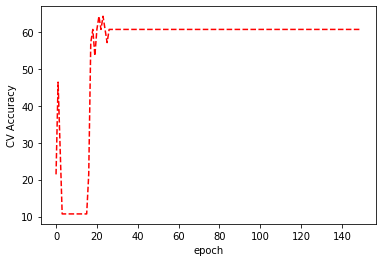

In [69]:

EPOCHS = 150
BATCH_SIZE = 1
LEARNING_RATE = 0.001
wd = 0.1
net = Net()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), LEARNING_RATE, weight_decay=wd)
pytorch_total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print(pytorch_total_params)

#set the loaders
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(dataset=test_data, batch_size=1)


## function for accuracy calculation
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    y_test = torch.round(y_pred)
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = acc * 100
    return acc

### setting the model to train
net.train()
acc_1 = []
def train() :    
  for e in range(1, EPOCHS+1):
      epoch_loss = 0
      epoch_acc = 0
      for i, data in enumerate(train_loader,0):
          X_batch, y_batch = data
          optimizer.zero_grad()
          X_batch = torch.flatten(X_batch)
          #print(X_batch.shape)
          #print(y_batch.shape)
          y_pred = net(Variable(X_batch.float()))
          #y_batch = torch.unsqueeze(y_batch, 1) 
          loss = criterion(y_pred,Variable(y_batch.float())) 
          acc = binary_acc(y_pred, y_batch)
          loss.backward()
          optimizer.step()
          epoch_loss += loss.item()
          epoch_acc += acc.item()
      print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
      acc_1.append(epoch_acc/len(train_loader))      

train()

plt.plot(acc_1, 'r--')
plt.ylabel('CV Accuracy')
plt.xlabel('epoch')
plt.show()